In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df


,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [2]:
df_az=df.loc[df.State=="AZ"]
df_az=df_az.drop(columns=["FIPS"])
df_az

,State,County,MapDate,DSCI,Year
0,AZ,Apache County,2000-01-04,43,2000
1,AZ,Apache County,2000-01-11,100,2000
2,AZ,Apache County,2000-01-18,100,2000
3,AZ,Apache County,2000-01-25,100,2000
4,AZ,Apache County,2000-02-01,100,2000
...,...,...,...,...,...
16435,AZ,Yuma County,2020-12-01,332,2020
16436,AZ,Yuma County,2020-12-08,332,2020
16437,AZ,Yuma County,2020-12-15,335,2020
16438,AZ,Yuma County,2020-12-22,335,2020


In [3]:
df_az_groups=df_az.groupby(["State","Year"]).mean()

In [4]:
df_az_groups.reset_index()

,State,Year,DSCI
0,AZ,2000,81.752564
1,AZ,2001,1.189744
2,AZ,2002,288.491824
3,AZ,2003,291.393590
4,AZ,2004,285.102564
5,AZ,2005,101.685897
6,AZ,2006,264.147436
7,AZ,2007,228.202564
8,AZ,2008,58.417610
9,AZ,2009,117.512821


In [5]:
df_az_groups=df_az_groups.groupby(["State","Year"]).mean().reset_index()
df_az_groups

,State,Year,DSCI
0,AZ,2000,81.752564
1,AZ,2001,1.189744
2,AZ,2002,288.491824
3,AZ,2003,291.393590
4,AZ,2004,285.102564
5,AZ,2005,101.685897
6,AZ,2006,264.147436
7,AZ,2007,228.202564
8,AZ,2008,58.417610
9,AZ,2009,117.512821


<AxesSubplot:xlabel='Year'>

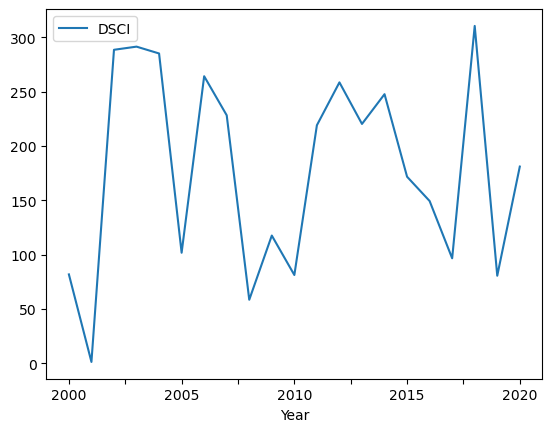

In [6]:
df_az_groups.plot(x="Year")

In [7]:
df_az_county_groups=df_az.groupby(["County","Year"]).mean().reset_index()
df_az_county_groups

,County,Year,DSCI
0,Apache County,2000,91.115385
1,Apache County,2001,1.673077
2,Apache County,2002,324.094340
3,Apache County,2003,331.211538
4,Apache County,2004,390.480769
...,...,...,...
310,Yuma County,2016,209.750000
311,Yuma County,2017,206.519231
312,Yuma County,2018,310.076923
313,Yuma County,2019,46.452830


In [8]:
county_list=df_az["County"].unique()
county_list

array(['Apache County', 'Cochise County', 'Coconino County',
       'Gila County', 'Graham County', 'Greenlee County', 'La Paz County',
       'Maricopa County', 'Mohave County', 'Navajo County', 'Pima County',
       'Pinal County', 'Santa Cruz County', 'Yavapai County',
       'Yuma County'], dtype=object)

Apache County
Cochise County
Coconino County
Gila County
Graham County
Greenlee County
La Paz County
Maricopa County
Mohave County
Navajo County
Pima County
Pinal County
Santa Cruz County
Yavapai County
Yuma County


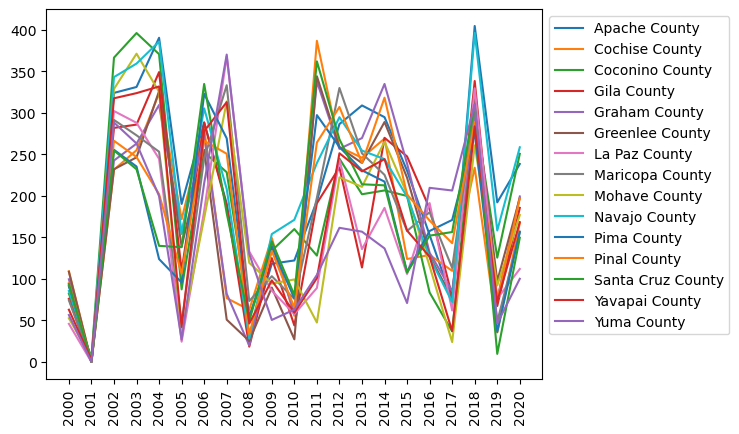

In [9]:
for county in county_list:
    print(county)
    df_az_map=df_az_county_groups.loc[df_az_county_groups["County"]==county]
    df_az_map=df_az_map.drop(columns=["County"])
    df_az_map=df_az_map.rename(columns={"DSCI": county + " DSCI "})
    x2=df_az_map["Year"].to_list()
    y2=df_az_map[county + " DSCI "].to_list()
    plt.plot(x2,y2,label=county)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()